___

[Walter Reade, Ashley Chow. (2023). Regression with a Mohs Hardness Dataset. Kaggle.](https://kaggle.com/competitions/playground-series-s3e25)

___

<h1 style="background-color:red;font-family:newtimeroman;color:black;font-size:400%;text-align:center;border-radius: 50px 50px;">Regression with a Mohs Hardness Dataset</h1>

By [Ale uy](https://www.kaggle.com/lasm1984)

<a id="seccion1"></a>
# <h1 style="background-color:orange;font-family:newtimeroman;color:black;font-size:350%;text-align:center;border-radius: 50px 50px;">Notebook Description</h1>

**About the Tabular Playground Series**

The goal of the Tabular Playground Series is to provide the Kaggle community with a variety of fairly light-weight challenges that can be used to learn and sharpen skills in different aspects of machine learning and data science. The duration of each competition will generally only last a few weeks, and may have longer or shorter durations depending on the challenge. The challenges will generally use fairly light-weight datasets that are synthetically generated from real-world data, and will provide an opportunity to quickly iterate through various model and feature engineering ideas, create visualizations, etc.

**Synthetically-Generated Datasets**

Using synthetic data for Playground competitions allows us to strike a balance between having real-world data (with named features) and ensuring test labels are not publicly available. This allows us to host competitions with more interesting datasets than in the past. While there are still challenges with synthetic data generation, the state-of-the-art is much better now than when we started the Tabular Playground Series two years ago, and that goal is to produce datasets that have far fewer artifacts. Please feel free to give us feedback on the datasets for the different competitions so that we can continue to improve!

**Goal:** 

The task is to use regression to predict the Mohs hardness of a mineral, given its properties.

<a id="seccion2"></a>
# <h1 style="background-color:orange;font-family:newtimeroman;color:black;font-size:350%;text-align:center;border-radius: 50px 50px;">Loading Libraries</h1>

Main libraries for data manipulation, plots and customization

In [1]:
import pandas as pd; pd.set_option('display.max_columns', 30)
import numpy as np

import matplotlib.pyplot as plt; plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px

import warnings; warnings.filterwarnings("ignore")

We import the other libraries when you need them and thus avoid loading them if we try other methods

<a id="seccion3"></a>
# <h1 style="background-color:orange;font-family:newtimeroman;color:black;font-size:350%;text-align:center;border-radius: 50px 50px;">Reading Data Files</h1> 

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6939 entries, 0 to 6938
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     6939 non-null   int64  
 1   allelectrons_Total     6939 non-null   float64
 2   density_Total          6939 non-null   float64
 3   allelectrons_Average   6939 non-null   float64
 4   val_e_Average          6939 non-null   float64
 5   atomicweight_Average   6939 non-null   float64
 6   ionenergy_Average      6939 non-null   float64
 7   el_neg_chi_Average     6939 non-null   float64
 8   R_vdw_element_Average  6939 non-null   float64
 9   R_cov_element_Average  6939 non-null   float64
 10  zaratio_Average        6939 non-null   float64
 11  density_Average        6939 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 650.7 KB


### Separate '`id`' and the target '`Hardness`'

In [5]:
train_id = train['id']
train.drop('id', axis=1, inplace=True)

test_id = test['id']
test.drop('id', axis=1, inplace=True)

TARGET = 'Hardness'

<a id="seccion4"></a>
# <h1 style="background-color:orange;font-family:newtimeroman;color:black;font-size:350%;text-align:center;border-radius: 50px 50px;">Data Exploration</h1>

## Dataset Description

In [6]:
train.describe().T

count        mean         std  min        25%  \
allelectrons_Total     10407.0  128.053516  224.123776  0.0  68.000000   
density_Total          10407.0   14.491342   15.972877  0.0   7.558488   
allelectrons_Average   10407.0   17.033222   10.468734  0.0  10.000000   
val_e_Average          10407.0    4.546789    0.690864  0.0   4.000000   
atomicweight_Average   10407.0   37.507703   26.012313  0.0  20.298893   
ionenergy_Average      10407.0   10.938308    1.408276  0.0  10.590660   
el_neg_chi_Average     10407.0    2.607662    0.334906  0.0   2.530000   
R_vdw_element_Average  10407.0    1.731330    0.192481  0.0   1.672500   
R_cov_element_Average  10407.0    0.944132    0.180017  0.0   0.864000   
zaratio_Average        10407.0    0.493349    0.063080  0.0   0.476196   
density_Average        10407.0    2.132984    1.936656  0.0   0.814800   
Hardness               10407.0    4.647126    1.680525  1.0   3.000000   

                              50%         75%           max  
allelectrons_Total     100.000000  131.000000  15300.000000  
density_Total           10.650000   16.676996    643.093804  
allelectrons_Average    12.600000   22.000000     67.000000  
val_e_Average            4.714286    4.800000      6.000000  
atomicweight_Average    26.203827   48.719500    167.400000  
ionenergy_Average       11.202760   11.670725     15.245810  
el_neg_chi_Average       2.706000    2.805000      3.443000  
R_vdw_element_Average    1.732727    1.800000      2.250000  
R_cov_element_Average    0.915556    0.981667      1.615840  
zaratio_Average          0.488550    0.496070      0.825990  
density_Average          1.351550    2.741550     10.970000  
Hardness                 5.500000    6.000000     10.000000

### Nulls Values

In [7]:
train.isna().sum().sort_values(ascending=False) / train.shape[0] * 100

allelectrons_Total       0.0
density_Total            0.0
allelectrons_Average     0.0
val_e_Average            0.0
atomicweight_Average     0.0
ionenergy_Average        0.0
el_neg_chi_Average       0.0
R_vdw_element_Average    0.0
R_cov_element_Average    0.0
zaratio_Average          0.0
density_Average          0.0
Hardness                 0.0
dtype: float64

In [8]:
test.isna().sum().sort_values(ascending=False) / test.shape[0] * 100

allelectrons_Total       0.0
density_Total            0.0
allelectrons_Average     0.0
val_e_Average            0.0
atomicweight_Average     0.0
ionenergy_Average        0.0
el_neg_chi_Average       0.0
R_vdw_element_Average    0.0
R_cov_element_Average    0.0
zaratio_Average          0.0
density_Average          0.0
dtype: float64

### Duplicate Values

In [9]:
train.duplicated().sum()

0

In [10]:
# train.drop_duplicates(inplace=True)

In [11]:
test.duplicated().sum()

0

### Kurtosis and Skew

In [12]:
pd.DataFrame({'train': train.kurtosis(), 'test': test.kurtosis()})

train         test
Hardness                 -0.793775          NaN
R_cov_element_Average     5.156704     5.075099
R_vdw_element_Average    40.696122    40.880686
allelectrons_Average      2.740956     2.668006
allelectrons_Total     2383.425529  1556.276209
atomicweight_Average      3.332072     3.227547
density_Average           2.422794     2.115909
density_Total           259.161522   313.397231
el_neg_chi_Average       22.175230    20.556445
ionenergy_Average        24.733284    23.335279
val_e_Average            12.494568    11.225967
zaratio_Average          24.828071    27.667758

In [13]:
pd.DataFrame({'train': train.skew(), 'test': test.skew()})

train       test
Hardness               -0.125749        NaN
R_cov_element_Average  -0.543889  -0.484246
R_vdw_element_Average  -4.672228  -4.586309
allelectrons_Average    1.660154   1.676412
allelectrons_Total     39.933463  33.391154
atomicweight_Average    1.797625   1.806874
density_Average         1.657419   1.609018
density_Total           9.764850  12.684474
el_neg_chi_Average     -3.466817  -3.215882
ionenergy_Average      -3.548715  -3.313438
val_e_Average          -2.347998  -2.127928
zaratio_Average        -1.318613  -1.657898

## Dataset Plots

### Density Function

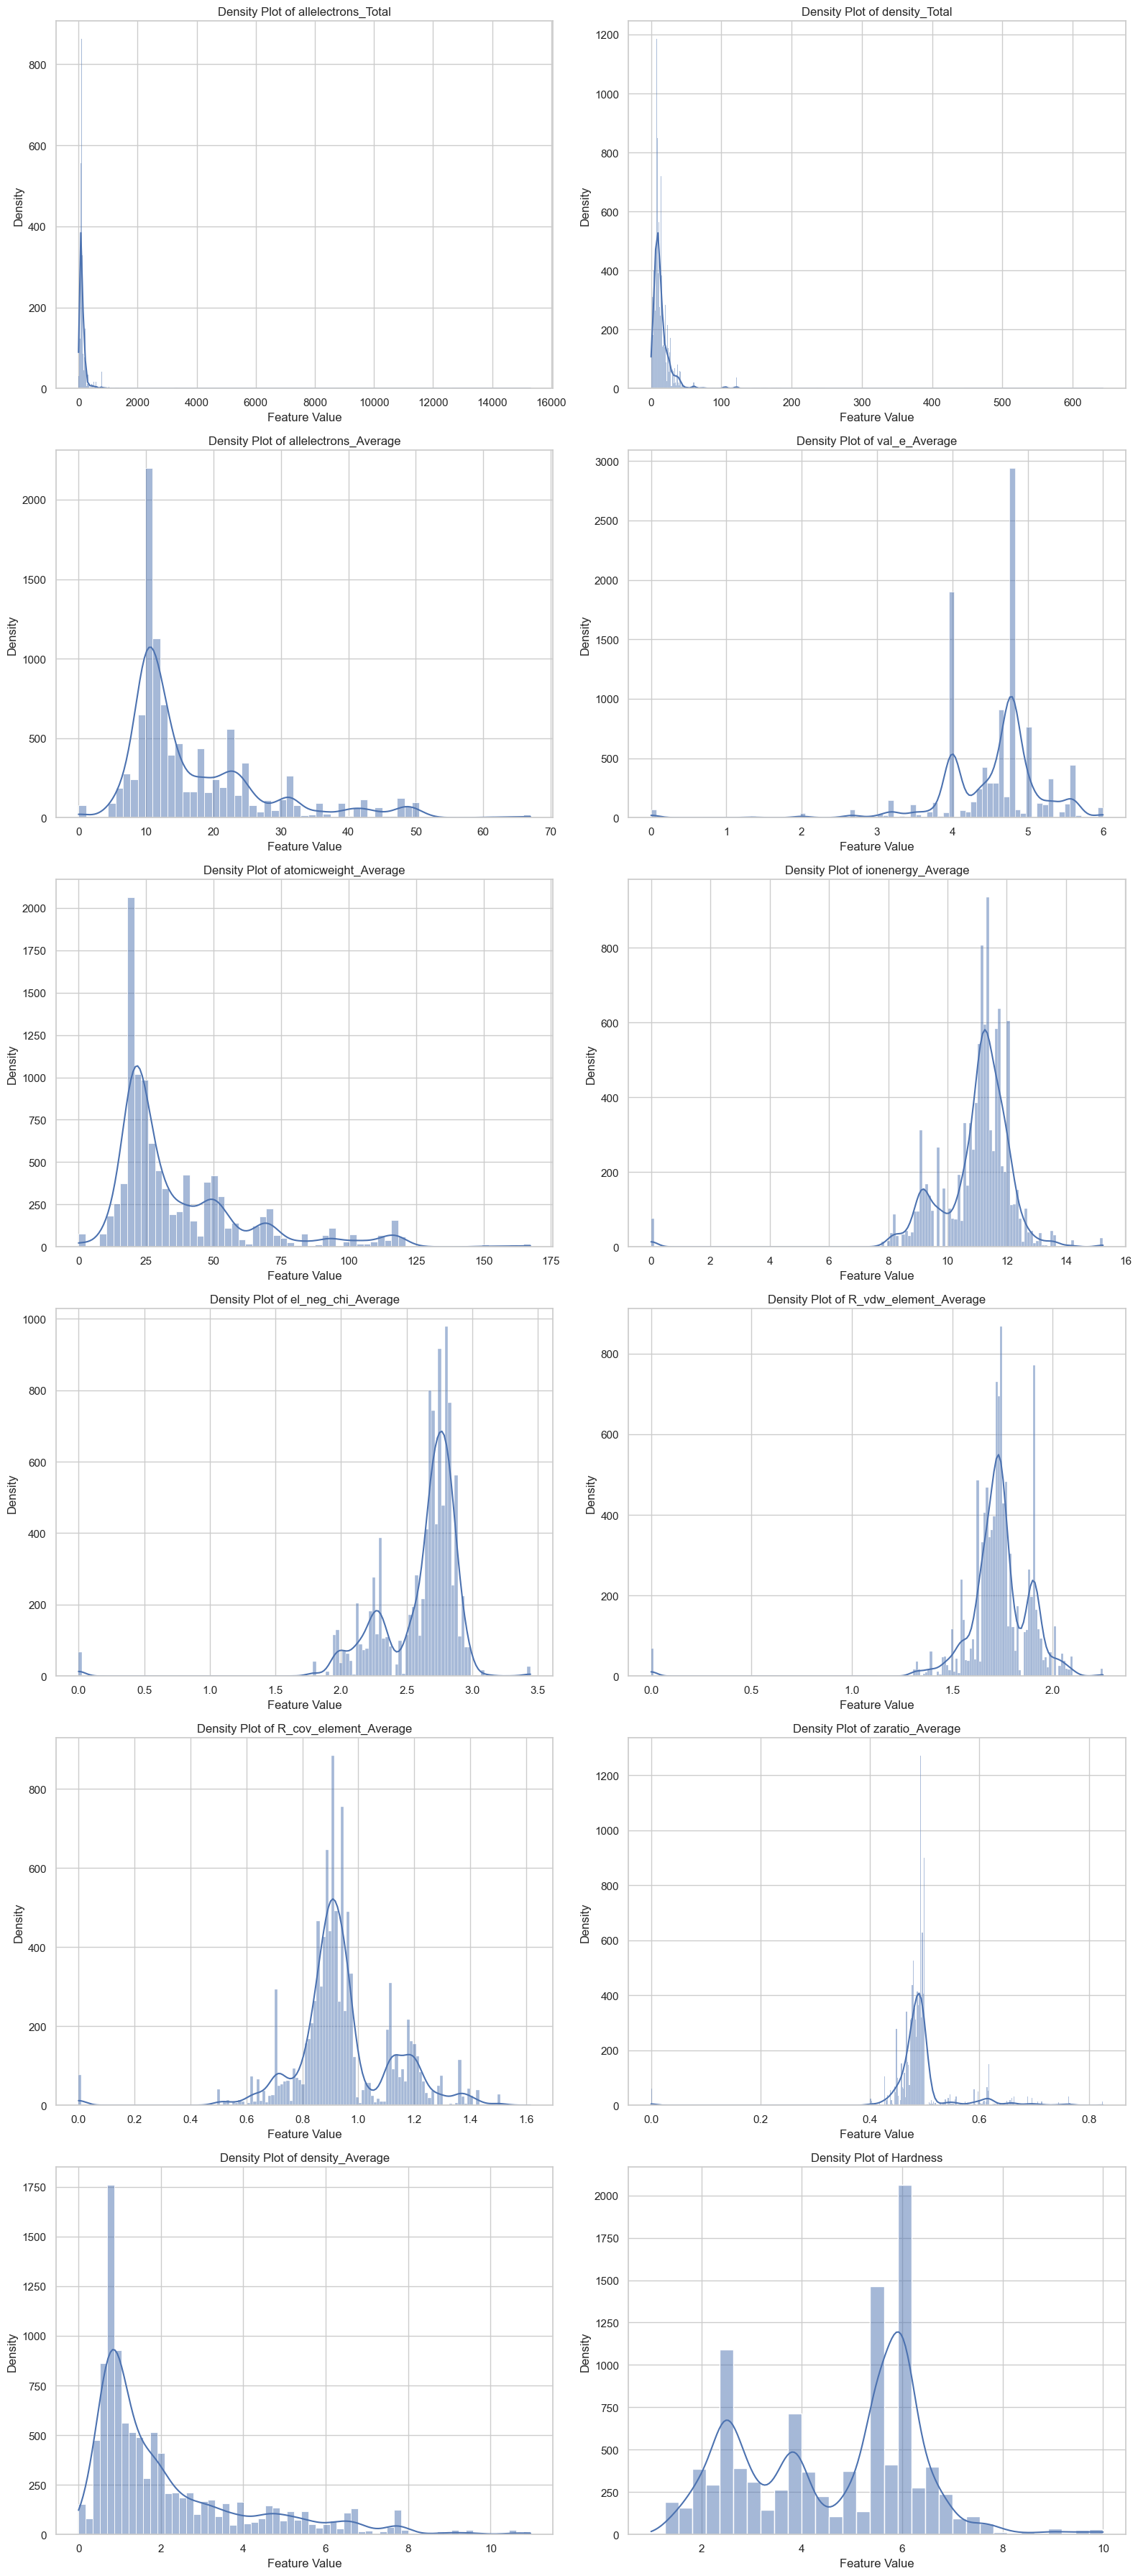

In [14]:
# Get the list of numerical columns in your DataFrame
numeric_columns = train.select_dtypes(include=['float', 'int']).columns

# Set the Seaborn style
sns.set(style="whitegrid")

# Define the plot size and the number of rows and columns in the grid
num_plots = len(numeric_columns)
rows = (num_plots + 1) // 2  # Calculate the number of rows needed (two plots per row)
cols = 2  # Two plots per row
_, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(8 * cols, 6 * rows))

# Iterate through the numerical features and create the density plots
for i, feature_name in enumerate(numeric_columns):
    row_idx, col_idx = divmod(i, cols)  # Calculate the current row and column index
    sns.histplot(data=train, x=feature_name, kde=True, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Density Plot of {feature_name}')
    axes[row_idx, col_idx].set_xlabel('Feature Value')
    axes[row_idx, col_idx].set_ylabel('Density')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

### Box Plots (Interactive)

In [15]:
# Melt the DataFrame to have all numerical variables in a single column
df_melted = pd.melt(train.select_dtypes(include=['float', 'int']))

# Define a custom color palette
custom_colors = px.colors.qualitative.Plotly  # You can change this to any other palette

# Generate a combined box plot with the custom color palette
fig = px.box(df_melted, x='variable', y='value', color='variable', color_discrete_sequence=custom_colors)
fig.update_layout(title='Box Plots')
fig.show()

### Correlations

<Axes: >

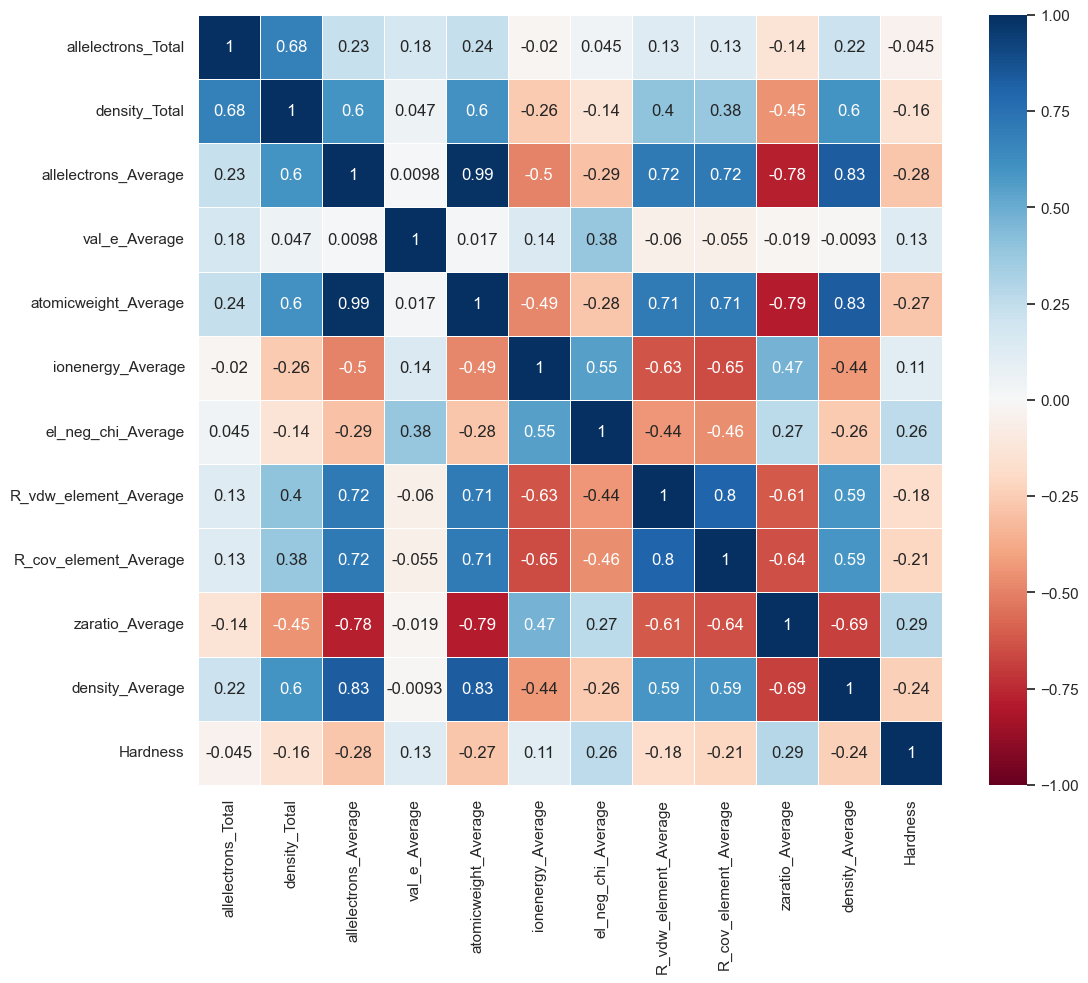

In [16]:
corr = train.corr(method='spearman')
plt.figure(figsize=(12, 10))
sns.heatmap(corr, linewidth=0.5, annot=True, cmap="RdBu", vmin=-1, vmax=1)

### Feature grouping

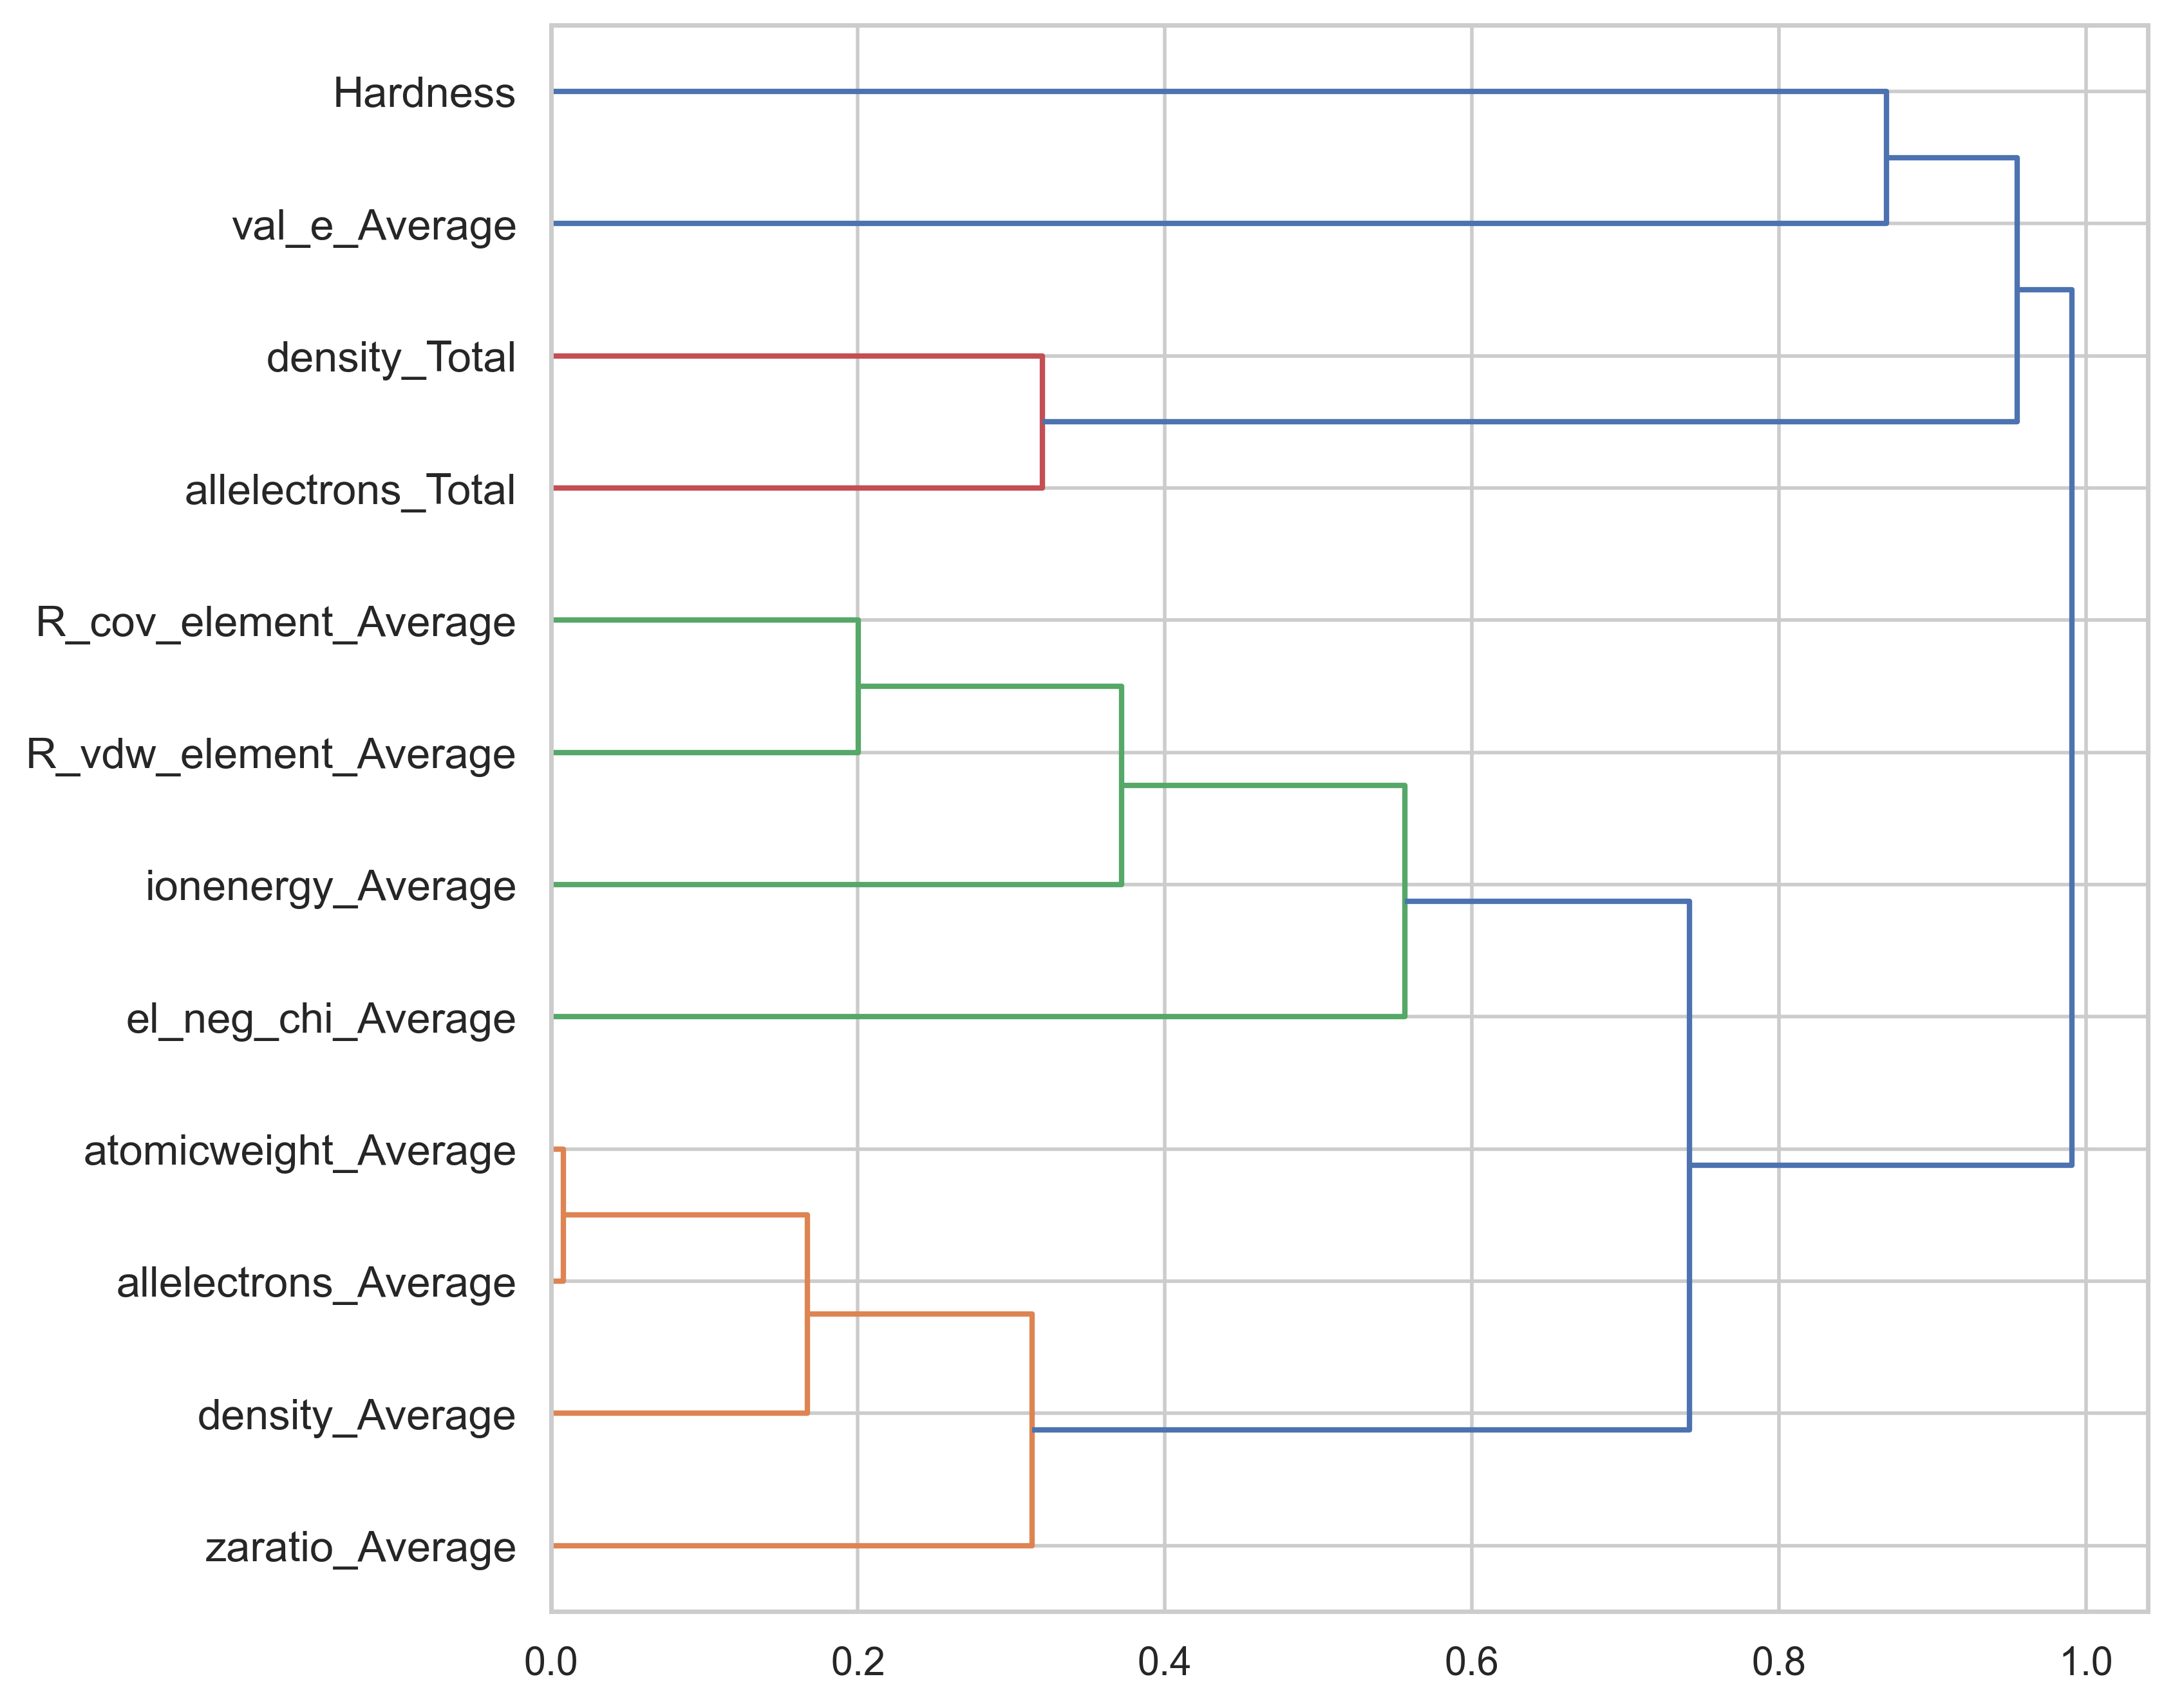

In [17]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform


corr = train.corr(method = "spearman")
link = linkage(squareform(1 - abs(corr)), "complete")
plt.figure(figsize = (8, 8), dpi = 400)
dendro = dendrogram(link, orientation='right', labels=train.columns)
plt.show()

## Conclusions of the Exploratory Data Analysis


* `'allelectrons_Total'` and `density_Total` have a very wide range and the first one has very little correlation with our target (0.045), we will apply <u>standard scaler</u> transformation and look at the headmap again
* ``'allelectrons_Total'``, ``'density_Totals'``, `'allelectrons_Average'`, `'atomicweight_Average'` and `'density_Average'` are right skewed and heavy tails
    * apply <u>logarithm</u> or <u>box-cox</u> is recommended.
* `'val_e_Average'`, `'ionenergy_Average'`, `'el_neg_chi_Average'`, `'R_vdw_element_Average'` and `'R_cov_element_Average'` are left skewed and heavy tails
    * apply <u>box-cox</u> or <u>square root</u> is recommended.
* `'allelectrons_Average'` and `'atomicweight_Average'` present an almost unitary correlation, the solutions can be to <u>eliminate one</u> of them, <u>add them</u> or use the <u>average between them</u>.
* The data has many <u>outliers</u>, the possibility of eliminating the most problematic ones could be explored.
* Applying <u>minmaxscaler</u> to the entire dataset can be an interesting idea.

### Apply Recommendations (select one of them or nothing... Tree-based models do not need transformations)

* Apply 'eliminate one'
    * They have a correlation of 0.99 so they provide practically the same information, but which one do we eliminate? We choose the one that has the least importance when running the base model, in this case we keep ``atomicweight_Average`` and eliminate ``allelectrons_Average``.

In [18]:
# train.drop(columns=['allelectrons_Average'], inplace=True)

# test.drop(columns=['allelectrons_Average'], inplace=True)

* Remove outliers (with the interquartile range method)
    * threshold determines the tolerance level, 1.5 is the standard to consider an outlier data

In [19]:
# threshold = 6 # extreme outliers

# Q1 = train.quantile(0.25)
# Q3 = train.quantile(0.75)

# IQR = Q3 - Q1

# lower_bound = Q1 - threshold * IQR
# upper_bound = Q3 + threshold * IQR

# train = train[((train >= lower_bound) & (train <= upper_bound)).all(axis=1)]

* Apply StandarScaler (only first two features)

In [20]:
# from sklearn.preprocessing import StandardScaler


# scaler = StandardScaler()

# train[['allelectrons_Total', 'density_Total']] = scaler.fit_transform(train[['allelectrons_Total', 'density_Total']])
# test[['allelectrons_Total', 'density_Total']] = scaler.fit_transform(test[['allelectrons_Total', 'density_Total']])

* Apply MinMaxScaler (all dataset except the target)

In [21]:
# from sklearn.preprocessing import MinMaxScaler


# scaler = MinMaxScaler()

# train_ = train.drop(columns=['Hardness'])
# train[train_.columns] = scaler.fit_transform(train[train_.columns])
# del(train_)

# test[test.columns] = scaler.fit_transform(test[test.columns])

* Apply Box-Cox
    * *Important! Since the feature values have zeros, you should use ``scipy.stats.boxcox1p``. In my case what I will do is add an infinitesimal value to each observation to be able to use traditional boxcox and find the best lambda value*

In [22]:
# from scipy.stats import boxcox


# train_ = train.drop(columns=['Hardness'])
# train_ += 1e-10
# test += 1e-10

# for col in train_.columns:
#     train[col], lambda_ = boxcox(train_[col])
#     test[col] = boxcox(test[col], lambda_)

* Apply log and square-root
    * *Important! Since the values of the features have zeros, we will use log1p.*

In [23]:
# right_skewed = ['allelectrons_Total',
#                 'density_Total',
#                 'allelectrons_Average',
#                 'atomicweight_Average',
#                 'density_Average']

# left_skewed = ['val_e_Average',
#                'ionenergy_Average',
#                'el_neg_chi_Average',
#                'R_vdw_element_Average',
#                'R_cov_element_Average']

# for col in right_skewed:
#     train[col] = np.log1p(train[col])
#     test[col] = np.log1p(test[col])
    
# for col in left_skewed:
#     train[col] = np.sqrt(train[col])
#     test[col] = np.sqrt(test[col])

*After applying the transformations, it is advisable to run the graph cells again for review.*

<a id="seccion5"></a>
# <h1 style="background-color:orange;font-family:newtimeroman;color:black;font-size:350%;text-align:center;border-radius: 50px 50px;">Individual Modeling</h1>

**It's time to create our models. We will use two models, first a linear model and boosting model LGB. I will use an artificial neural network as a meta model in stacking**

### Create dependent variable and array of independent variables

In [24]:
from sklearn.model_selection import train_test_split


y = train['Hardness']
X = train.drop(columns=['Hardness'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Metric Models

In [25]:
from sklearn.metrics import median_absolute_error


def apply_metrics(y_test, y_pred):
    """
    Calculates metrics.

    Parameters:
        y_test (array-like): True values of the target variable (ground truth).
        y_pred (array-like): Predicted values by the model.

    Returns:
        pandas DataFrame: A DataFrame containing the metrics and their respective values.
    """

    MAE = median_absolute_error(y_test, y_pred)

    metric_df = pd.DataFrame({
        'Metric': ['Median Absolute Error (MAE)'],
        'Value': [MAE]
    })

    return metric_df

<a id="seccion51"></a>
# <h2 style="background-color:gold;font-family:newtimeroman;color:black;font-size:200%;text-align:center;border-radius: 50px 50px;">Linear Model</h2>

Let's create a linear model

In [26]:
import statsmodels.api as sm


# Add a constant to the data set to fit the intersection
X_with_intercept = sm.add_constant(X)

# Adjust an OLS (Ordinary Least Squares) model
model_ols = sm.OLS(y, X_with_intercept).fit()

In [27]:
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Hardness   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     306.7
Date:                Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:41:42   Log-Likelihood:                -18706.
No. Observations:               10407   AIC:                         3.744e+04
Df Residuals:                   10395   BIC:                         3.752e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.2275      0.180     17.921      0.000       2.874       3.580
allelectrons_Total       -0.0002   8.32e-05     -2.939      0.003      -0.000   -8.14e-05
density_Total          9.326e-05      0.001      0.074      0.941      -0.002       0.003
allelectrons_Average     -0.0400      0.011     -3.762      0.000      -0.061      -0.019
val_e_Average             0.0557      0.028      1.993      0.046       0.001       0.110
atomicweight_Average     -0.0117      0.004     -2.854      0.004      -0.020      -0.004
ionenergy_Average        -0.0947      0.020     -4.811      0.000      -0.133      -0.056
el_neg_chi_Average        1.0552      0.074     14.285      0.000       0.910       1.200
R_vdw_element_Average     2.0195      0.150     13.443      0.000       1.725       2.314
R_cov_element_Average    -0.4841      0.171     -2.834      0.005      -0.819      -0.149
zaratio_Average          -4.5726      0.312    -14.649      0.000      -5.184      -3.961
density_Average          -0.0854      0.013     -6.725      0.000      -0.110      -0.060
==============================================================================
Omnibus:                       98.099   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.757
Skew:                          -0.212   Prob(JB):                     1.79e-23
Kurtosis:                       3.248   Cond. No.                     5.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Let's check the assumptions of the linear model

* Linearity

In [28]:
# # Perform the RESET test
# reset_test = sm.stats.diagnostic.linear_reset(model_ols)
# print(f'p value of RESET test: {reset_test.pvalue}')

# # Interpret the result
# if reset_test.pvalue > 0.05:
#     print('There is no evidence of nonlinearity in the model.')
# else:
#     print('There may be evidence of nonlinearity in the model.')

* Waste Normality

In [29]:
from scipy.stats import shapiro


# Check normality of waste
residuals = model_ols.resid
_, p_value = shapiro(residuals)
print(f'p value of the Shapiro-Wilk test: {p_value}')

# Interpret the result
if p_value > 0.05:
    print('The residuals follow a normal distribution.')
else:
    print('The residuals do not follow a normal distribution.')

p value of the Shapiro-Wilk test: 1.1502969865639387e-36
The residuals do not follow a normal distribution.


* Homoscedasticity (Constant Variance)

In [30]:
from statsmodels.stats.diagnostic import het_breuschpagan


# Perform the Breusch-Pagan test
_, p_value, _, _ = het_breuschpagan(model_ols.resid, X_with_intercept)
print(f'p value of the Breusch-Pagan test: {p_value}')

# Interpret the result
if p_value > 0.05:
    print('There is no significant evidence of heteroskedasticity.')
else:
    print('There is significant evidence of heteroskedasticity.')

p value of the Breusch-Pagan test: 4.636046927606107e-75
There is significant evidence of heteroskedasticity.


* Waste Independence

In [31]:
from statsmodels.stats.stattools import durbin_watson

# Check autocorrelation of the residuals
dw_statistic = durbin_watson(residuals)
print(f'Durbin-Watson statistics: {dw_statistic}')

# Interpret the result
tolerance = 2.0  # You can adjust the tolerance according to your needs

if abs(dw_statistic - 2) < tolerance:
    print('There is no evidence of autocorrelation in the residuals.')
else:
    print('There may be autocorrelation in the residuals.')


Durbin-Watson statistics: 2.0182251571586765
There is no evidence of autocorrelation in the residuals.


* Multicollinearity

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIFs
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Multicollinearity"] = pd.cut(vif['VIF'], bins=[-float('inf'), 1, 5, 10, float('inf')],
                                  labels=['No', 'Moderate', 'High', 'Very High'])


# Show VIFs
print(vif)

                 Variable         VIF Multicollinearity
0      allelectrons_Total    2.249520          Moderate
1           density_Total    3.558978          Moderate
2    allelectrons_Average  220.711632         Very High
3           val_e_Average   80.057840         Very High
4    atomicweight_Average  170.840402         Very High
5       ionenergy_Average  229.618236         Very High
6      el_neg_chi_Average  178.701572         Very High
7   R_vdw_element_Average  310.424659         Very High
8   R_cov_element_Average  131.054270         Very High
9         zaratio_Average  101.729587         Very High
10        density_Average    6.503612              High


### Submission and Scoring

In [33]:
# add intercept to train dataset
test_with_intercept = sm.add_constant(test)

# Test a submission
submission = pd.DataFrame()
submission['id'] = test_id
submission['Hardness'] = model_ols.predict(test_with_intercept)

In [34]:
submission.to_csv('model_ols.csv', index = False)

<p style=color:red;font-size:150%><b>
CONCLUSION: linear model is not a good option.
</b></p>

<p style=color:red;font-size:150%><b>
* Scoring MedAE: 1.04357
</b></p>

<a id="seccion52"></a>
# <h2 style="background-color:gold;font-family:newtimeroman;color:black;font-size:200%;text-align:center;border-radius: 50px 50px;">LightGBM, CatBoost, XGBoost</h2>

last update:

* the three models together present a lower performance than individually
* The lightgbm model is the one that has had the best performance

### Create Basic ensemble LGB Models and Train

In [35]:
## These parameters are those of the best-fitting model.

# params = {'boosting_type': 'gbdt',
#  'class_weight': None,
#  'colsample_bytree': 1.0,
#  'importance_type': 'split',
#  'learning_rate': 0.1,
#  'max_depth': -1,
#  'min_child_samples': 20,
#  'min_child_weight': 0.001,
#  'min_split_gain': 0.0,
#  'n_estimators': 100,
#  'n_jobs': -1,
#  'num_leaves': 31,
#  'objective': None,
#  'random_state': None,
#  'reg_alpha': 0.0,
#  'reg_lambda': 0.0,
#  'silent': 'warn',
#  'subsample': 1.0,
#  'subsample_for_bin': 200000,
#  'subsample_freq': 0}

In [36]:
from lightgbm import LGBMRegressor

model_lgb = LGBMRegressor()

### Train Model

In [37]:
model_lgb.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2477
[LightGBM] [Info] Number of data points in the train set: 9366, number of used features: 11
[LightGBM] [Info] Start training from score 4.643299


LGBMRegressor()

Observe the importance of features

In [38]:
for col in range(len(X.columns)):
    print(X.columns[col], model_lgb.feature_importances_[col])

allelectrons_Total 245
density_Total 329
allelectrons_Average 154
val_e_Average 284
atomicweight_Average 235
ionenergy_Average 303
el_neg_chi_Average 307
R_vdw_element_Average 243
R_cov_element_Average 287
zaratio_Average 293
density_Average 320


<Axes: >

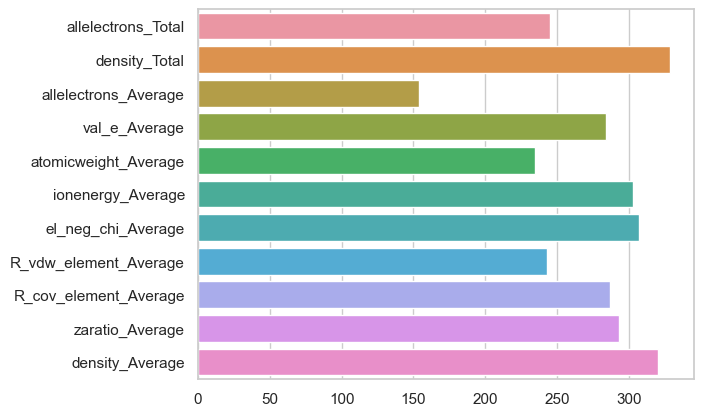

In [39]:
sns.barplot(x = list(model_lgb.feature_importances_), y = list(model_lgb.feature_name_))

Delete the unimportant features and run again without them

In [40]:
# delete_col = '' 

# X.drop(columns=[delete_col], inplace=True)
# train.drop(columns=[delete_col], inplace=True)

MAE metric

In [41]:
print(f'LGB 1: {apply_metrics(y_train, model_lgb.predict(X_train))}\n')
print(f'LGB 0: {apply_metrics(y_test, model_lgb.predict(X_test))}\n')
print(f'LGB: {apply_metrics(y, model_lgb.predict(X))}\n')

LGB 1:                         Metric     Value
0  Median Absolute Error (MAE)  0.539863

LGB 0:                         Metric     Value
0  Median Absolute Error (MAE)  0.642132

LGB:                         Metric     Value
0  Median Absolute Error (MAE)  0.551874



### Predict Models

In [42]:
X['Hardness_lgb'] = model_lgb.predict(X)

In [43]:
X_train['Hardness_lgb'] = model_lgb.predict(X_train)
X_test['Hardness_lgb'] = model_lgb.predict(X_test)

<a id="seccion6"></a>
# <h1 style="background-color:orange;font-family:newtimeroman;color:black;font-size:350%;text-align:center;border-radius: 50px 50px;">Meta Model</h1>

### Create a stack with the three previous models and the output is made with the artificial neural network

>NOTE: Create the custom neural network meta-model based in this [Great Job!](https://www.kaggle.com/code/larjeck/regression-with-a-mohs-hardness-dataset-optimal)

Create the loss function and metric to use in the model

In [44]:
import tensorflow as tf
import tensorflow_probability as tfp


def loss_fn(y_true, y_pred):
    return tfp.stats.percentile(tf.abs(y_true - y_pred), q=50)

def metric_fn(y_true, y_pred):
    return tfp.stats.percentile(tf.abs(y_true - y_pred), q=100) - tfp.stats.percentile(tf.abs(y_true - y_pred), q=0)

These **callbacks** are used to improve the performance and stability of training deep learning models. ``EarlyStopping`` prevents overfitting by stopping training when the validation metric stops improving, ``ReduceLROnPlateau`` dynamically adjusts the learning rate for more stable training, `LearningRateScheduler` used to dynamically adjust the learning rate during training of a neural network model where ``tf.keras.optimizers.schedules.ExponentialDecay`` the learning rate will decrease exponentially as the epochs advance. and ``TerminateOnNaN`` stops training if there are numerical problems.

In [45]:
callbacks_list = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=2, mode='min',restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, min_lr=0.00001),
    tf.keras.callbacks.TerminateOnNaN()
]

In [47]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.BatchNormalization(momentum=0.99, epsilon=0.00001, input_shape=(len(X.columns), )),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(0.013, beta_1=0.5, beta_2=0.999, epsilon=1e-07),
                  loss=loss_fn,
                  metrics=[metric_fn])

    return model

model = create_model()

model.fit(X.astype('float32'), y.astype('float32'),
            epochs=100,
            class_weight=model_lgb.class_weight,
            callbacks=callbacks_list,
            validation_split=0.1)


Epoch 1/100

293/293 [==============================] - 4s 5ms/step - loss: 1.2613 - metric_fn: 4.2039 - val_loss: 0.7429 - val_metric_fn: 3.5931 - lr: 0.0130
Epoch 2/100
293/293 [==============================] - 1s 4ms/step - loss: 0.8519 - metric_fn: 3.2271 - val_loss: 0.5890 - val_metric_fn: 3.1959 - lr: 0.0130
Epoch 3/100
293/293 [==============================] - 1s 3ms/step - loss: 0.7441 - metric_fn: 3.2553 - val_loss: 0.5963 - val_metric_fn: 3.3805 - lr: 0.0130
Epoch 4/100
293/293 [==============================] - 1s 3ms/step - loss: 0.6865 - metric_fn: 3.1029 - val_loss: 0.5589 - val_metric_fn: 3.2732 - lr: 0.0130
Epoch 5/100
293/293 [==============================] - 1s 3ms/step - loss: 0.5718 - metric_fn: 3.1834 - val_loss: 0.4620 - val_metric_fn: 3.3347 - lr: 0.0130
Epoch 6/100
293/293 [==============================] - 1s 3ms/step - loss: 0.6051 - metric_fn: 3.3247 - val_loss: 0.7742 - val_metric_fn: 3.7206 - lr: 0.0130
Epoch 7/100
293/293 [=============================

In [48]:
print(f'Train Data: {apply_metrics(y_train, model.predict(X_train))}\n')
print(f'Test Data: {apply_metrics(y_test, model.predict(X_test))}\n')
print(f'Total Data: {apply_metrics(y, model.predict(X))}\n')

293/293 [==============================] - 1s 2ms/step
Train Data:                         Metric    Value
0  Median Absolute Error (MAE)  0.33346

33/33 [==============================] - 0s 2ms/step
Test Data:                         Metric     Value
0  Median Absolute Error (MAE)  0.334993

326/326 [==============================] - 1s 2ms/step
Total Data:                         Metric    Value
0  Median Absolute Error (MAE)  0.33373



The values predicted by our base models must be added to the test dataset.

In [49]:
test['Hardness_lgb'] = model_lgb.predict(test)

We predict the Hardness value with the test dataset

In [50]:
test_pred = model.predict(test)

217/217 [==============================] - 1s 2ms/step


### Submission and Scoring

In [51]:
# Test a submission
submission = pd.DataFrame()
submission['id'] = test_id
submission['Hardness'] = test_pred

In [52]:
submission

id  Hardness
0     10407  2.487123
1     10408  2.334804
2     10409  5.741915
3     10410  3.495720
4     10411  5.741915
...     ...       ...
6934  17341  5.741915
6935  17342  5.726176
6936  17343  5.741915
6937  17344  5.185040
6938  17345  2.235037

[6939 rows x 2 columns]

In [54]:
submission.to_csv('submission.csv', index = False)

<p style=color:green;font-size:150%><b>
CONCLUSION: Stacking with NN meta-model can be a good option.
</b></p>

<p style=color:green;font-size:150%><b>
* Scoring MedAE: 0.36
</b></p>

<a id="seccion7"></a>
# <h1 style="background-color:orange;font-family:newtimeroman;color:black;font-size:350%;text-align:center;border-radius: 50px 50px;">Conclusions</h1>

<p style=color:skyblue;font-size:150%><b>
The best result:

* Use a LightGBM as a base model without customization
* Use a custom neural network as a meta model:

    * original data plus base model predictions
    * two hidden layers (16, 32)
    * loss and metric based on quartiles
    * custom callbacks to avoid overfit
    * an optimizer adam (initial lr 0.013)
    
</b></p>